# Heart Disease Dataset
   by Renato Dunaevits and Shani Bronshtein

# Import liberies

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from functions import create_pie_chart
from functions import plot_side_by_side
from functions import normalize_plot
from functions import graph_with_lines


import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

# The Data

In [210]:
heartdf=pd.read_csv('heart_2020_cleaned.csv')

source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

# Features

Key: 

Target --> HeartDisease (yes/no) - Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

* BMI - Body Mass Index 
* Smoking - Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
* AlcoholDrinking - Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
* Stroke - Ever told) you had a stroke?
* PhysicalHealth - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)
* MentalHealth - Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)
* DiffWalking - Do you have serious difficulty walking or climbing stairs?
* Sex - male/female
* AgeCategory - Fourteen-level age category
* Race - Imputed race/ethnicity value
* Diabetic - Ever told you had diabetes?
* PhysicalActivity - Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
* GenHealth - Would you say that in general your health is...
* SleepTime - On average, how many hours of sleep do you get in a 24-hour period?
* Asthma - Ever told you had asthma?
* KidneyDisease - Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
* SkinCancer - Ever told you had skin cancer?

# EDA

In [211]:
heartdf.shape

(319795, 18)

In [212]:
heartdf.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [213]:
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [214]:
heartdf.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [215]:
heartdf.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [216]:
heartdf.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [217]:
heartdf.duplicated().sum()

18078

In [218]:
heart_for_dup=heartdf.copy()

In [219]:
heart_for_dup.shape

(319795, 18)

In [220]:
#drop duplicates
heart_for_dup.drop_duplicates(inplace=True)

In [221]:
heart_for_dup.shape

(301717, 18)

In [222]:
#targe vs.non-targe

heart_for_dup.groupby(['HeartDisease']).size()

HeartDisease
No     274456
Yes     27261
dtype: int64

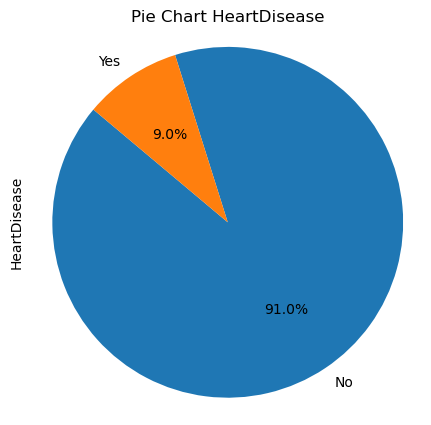

In [223]:
create_pie_chart(heart_for_dup,'HeartDisease')

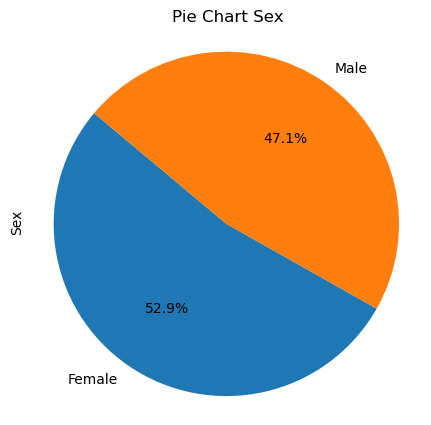

In [224]:
create_pie_chart(heart_for_dup,'Sex')

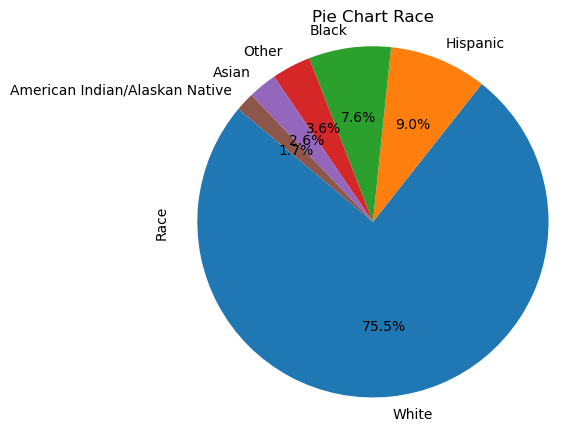

In [225]:
create_pie_chart(heart_for_dup,'Race')

In [226]:
heart_for_dup.groupby(['Race']).size().sort_values()

Race
American Indian/Alaskan Native      5192
Asian                               7993
Other                              10891
Black                              22810
Hispanic                           27107
White                             227724
dtype: int64

In [227]:
heart_for_dup.groupby(['Smoking']).size().sort_values()

Smoking
Yes    127405
No     174312
dtype: int64

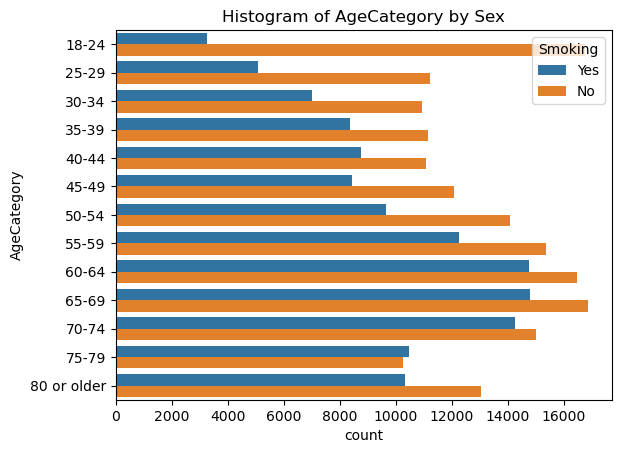

In [228]:
sns.countplot(data=heart_for_dup,y='AgeCategory',hue='Smoking',order=order_age)

plt.title('Histogram of AgeCategory by Sex')
plt.show()

In [229]:
heart_for_dup.groupby(['Sex','HeartDisease'])['HeartDisease'].count()

Sex     HeartDisease
Female  No              148458
        Yes              11213
Male    No              125998
        Yes              16048
Name: HeartDisease, dtype: int64

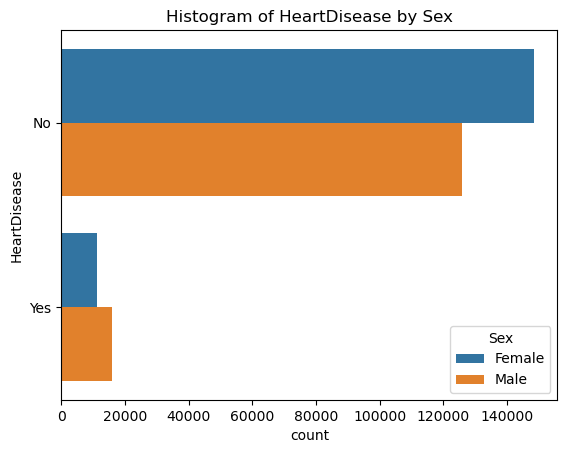

In [230]:
sns.countplot(data=heart_for_dup,y='HeartDisease',hue='Sex')

plt.title('Histogram of HeartDisease by Sex')
plt.show()

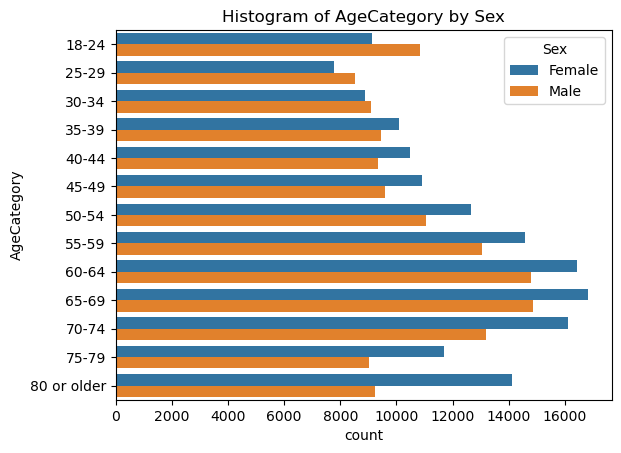

In [231]:
sns.countplot(data=heart_for_dup,y='AgeCategory',hue='Sex',order=order_age)

plt.title('Histogram of AgeCategory by Sex')
plt.show()

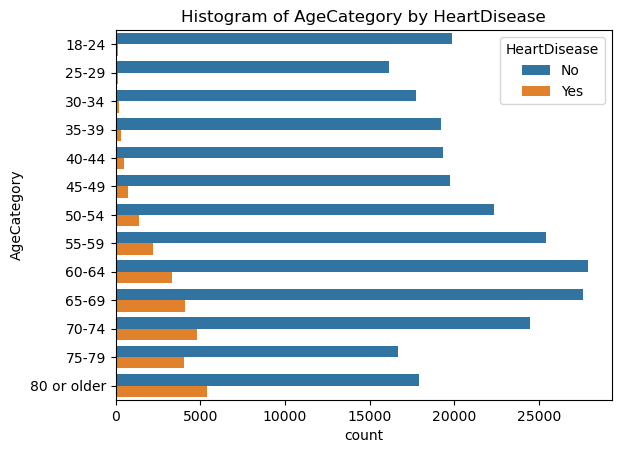

In [232]:
sns.countplot(data=heart_for_dup,y='AgeCategory',hue='HeartDisease',order=order_age)

plt.title('Histogram of AgeCategory by HeartDisease')
plt.show()

In [233]:
heart_for_dup['AlcoholDrinking'].value_counts()

No     280136
Yes     21581
Name: AlcoholDrinking, dtype: int64

In [234]:
heart_for_dup.groupby(['AlcoholDrinking','HeartDisease'])['HeartDisease'].count()

AlcoholDrinking  HeartDisease
No               No              254016
                 Yes              26120
Yes              No               20440
                 Yes               1141
Name: HeartDisease, dtype: int64

In [235]:
heart_for_dup['KidneyDisease'].value_counts()

No     289941
Yes     11776
Name: KidneyDisease, dtype: int64

In [236]:
heart_for_dup.groupby(['KidneyDisease','HeartDisease'])['HeartDisease'].count()

KidneyDisease  HeartDisease
No             No              266134
               Yes              23807
Yes            No                8322
               Yes               3454
Name: HeartDisease, dtype: int64

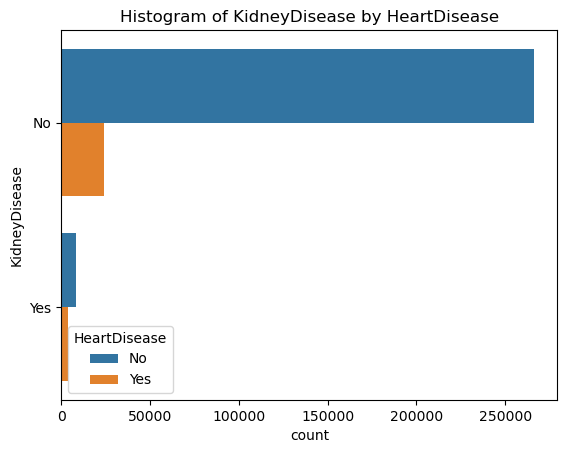

In [237]:
sns.countplot(data=heart_for_dup,y='KidneyDisease',hue='HeartDisease')

plt.title('Histogram of KidneyDisease by HeartDisease')
plt.show()

In [239]:
heart_for_dup.groupby(['SkinCancer','HeartDisease'])['HeartDisease'].count()

SkinCancer  HeartDisease
No          No              250132
            Yes              22293
Yes         No               24324
            Yes               4968
Name: HeartDisease, dtype: int64

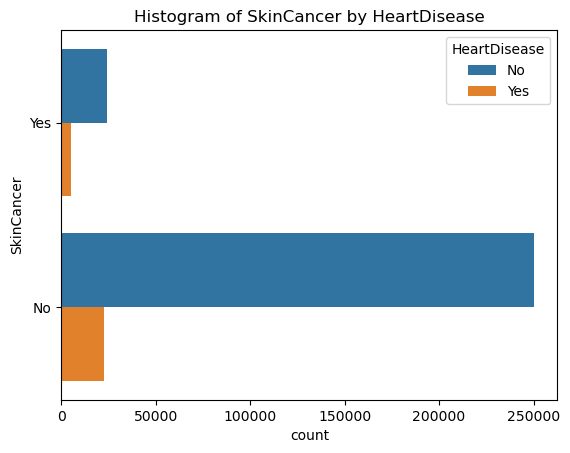

In [240]:
sns.countplot(data=heart_for_dup,y='SkinCancer',hue='HeartDisease')

plt.title('Histogram of SkinCancer by HeartDisease')
plt.show()

In [241]:
heart_for_dup.groupby(['SkinCancer','Race'])['Race'].count()

SkinCancer  Race                          
No          American Indian/Alaskan Native      5022
            Asian                               7937
            Black                              22672
            Hispanic                           26693
            Other                              10411
            White                             199690
Yes         American Indian/Alaskan Native       170
            Asian                                 56
            Black                                138
            Hispanic                             414
            Other                                480
            White                              28034
Name: Race, dtype: int64

In [242]:
heart_for_dup.groupby(['Asthma','HeartDisease'])['HeartDisease'].count()

Asthma  HeartDisease
No      No              236737
        Yes              22329
Yes     No               37719
        Yes               4932
Name: HeartDisease, dtype: int64

In [243]:
heart_for_dup.groupby(['Diabetic','HeartDisease'])['HeartDisease'].count()

Diabetic                 HeartDisease
No                       No              234380
                         Yes              17416
No, borderline diabetes  No                5987
                         Yes                789
Yes                      No               31641
                         Yes               8948
Yes (during pregnancy)   No                2448
                         Yes                108
Name: HeartDisease, dtype: int64

In [244]:
heart_for_dup.Diabetic.value_counts()

No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: Diabetic, dtype: int64

In [245]:
heart_for_dup.GenHealth.value_counts()

Very good    104796
Good          91239
Excellent     59737
Fair          34659
Poor          11286
Name: GenHealth, dtype: int64

In [247]:
#check if diabetic=yes, during pregnacy are only female? 
heart_only_peg=heart_for_dup.copy()

In [248]:
heart_only_peg=(heart_only_peg[heart_only_peg.Diabetic=='Yes (during pregnancy)'])

In [249]:
heart_only_peg.shape

(2556, 18)

In [255]:
#List of age group
order_age=['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older']

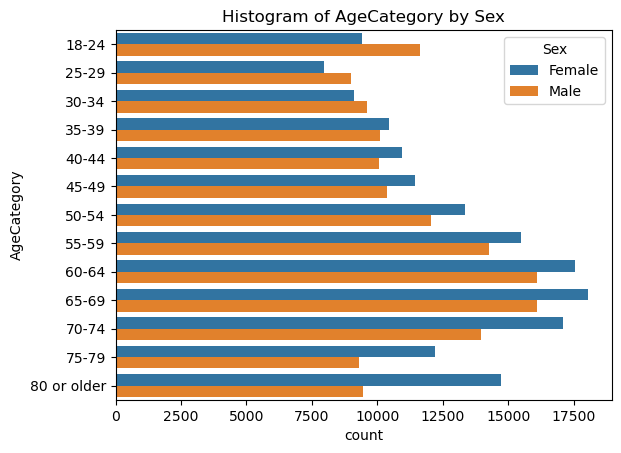

In [256]:
sns.countplot(data=heart_for_dup,y='AgeCategory',hue='Sex',order=order_age)

plt.title('Histogram of AgeCategory by Sex')
plt.show()

In [257]:
#Until age of 35, there is more male then female
#most of the data - ages 55-75

In [261]:
normalize_plot(heart_for_dup[heart_for_dup.HeartDisease=='Yes'],'AgeCategory','Smoking',order_age)

TypeError: normalize_plot() takes 3 positional arguments but 4 were given

In [262]:
#note: this plot represent only the sick people
#it's clear that smokers have more heart disease

In [263]:
order_GenHealth = ['Poor','Fair','Good','Very good','Excellent']

# generall health - Would you say that in general your health is.. 
#means that feature is subjective!

In [264]:
normalize_plot(heart_for_dup,'GenHealth','Smoking',order_GenHealth)

TypeError: normalize_plot() takes 3 positional arguments but 4 were given

In [ ]:
normalize_plot(heart_for_dup,'GenHealth','HeartDisease',order_GenHealth)

In [ ]:
normalize_plot(heart_for_dup,'Stroke','HeartDisease')

In [ ]:
normalize_plot(heart_for_dup,'Diabetic','HeartDisease')

In [ ]:
normalize_plot(heart_for_dup,'Asthma','HeartDisease')

In [ ]:
normalize_plot(heart_for_dup,'KidneyDisease','HeartDisease')

In [ ]:
normalize_plot(heart_for_dup,'SkinCancer','HeartDisease')

In [ ]:
normalize_plot(heart_for_dup,'GenHealth','PhysicalActivity',order_GenHealth)

In [ ]:
# neseccery to change the lables to 'stroke' and 'non-stroke', also change the colors

In [ ]:
sns.boxplot(x='SleepTime', data=heart_for_dup)

In [ ]:
#def graph_with_lines(df,byparam,param1,param2=None):

#    plt.figure(figsize=(8,5))

#    df.groupby(byparam).size().plot(kind='bar')

#    df.groupby(byparam)[param1].mean().plot(kind='line', secondary_y=True, color='b', label=param1)
    
 #   if param2==None:
  #      None
   # else:
    #    df.groupby(byparam)[param2].mean().plot(kind='line', secondary_y=True, color='r', label=param2)

   # plt.title(f'Parameters Average by {byparam}')
   # plt.legend(loc="upper left")


In [ ]:
graph_with_lines(heart_for_dup,'AgeCategory','SleepTime')

plt.xticks(ticks=range(len(order_age)), labels=order_age)
plt.show()

In [ ]:
graph_with_lines(heart_for_dup,'Sex','SleepTime')

In [ ]:
# not sure why we need the line

In [ ]:
graph_with_lines(heart_for_dup,'AgeCategory','PhysicalHealth','MentalHealth')

plt.xticks(ticks=range(len(order_age)), labels=order_age)

plt.show()


In [ ]:
graph_with_lines(heart_for_dup[heart_for_dup.PhysicalActivity =="Yes"],'AgeCategory','PhysicalHealth','MentalHealth')
graph_with_lines(heart_for_dup[heart_for_dup.PhysicalActivity =="No"],'AgeCategory','PhysicalHealth','MentalHealth')
plt.xticks(ticks=range(len(order_age)), labels=order_age)

plt.show()

In [ ]:
#physical -  Now thinking about your physical health, which includes physical illness and injury, 
#           for how many days during the past 30 days was your physical health not good? (0-30 days)


#mental - Thinking about your mental health, 
#         for how many days during the past 30 days was your mental health not good? (0-30 days)

#subjectly, people need to rank the health of themselve in the past 30 days.  
# 0 - no illness or injury

#first, ckeck that two features without plot. next, chagne the plot. one plot for phycal and anther for mantal by ages
# and heart disease.


In [ ]:
#
heart_for_dup.groupby(['PhysicalHealth']).size()

In [ ]:
heart_for_dup.groupby(['MentalHealth']).size()

In [ ]:
#show only sick peole
heartdf_yes=(heart_for_dup[heart_for_dup.HeartDisease=='Yes'])

In [ ]:
heartdf_yes.groupby(['PhysicalHealth']).size()

In [ ]:
heartdf_yes.groupby(['MentalHealth']).size()

In [ ]:
heartdf_yes.groupby(['Race']).size()

In [ ]:
graph_with_lines('Race','PhysicalHealth','MentalHealth')

In [ ]:
graph_with_lines('GenHealth','PhysicalHealth','MentalHealth')
plt.xticks(ticks=range(len(order_GenHealth)), labels=order_GenHealth)

plt.show()

In [ ]:
graph_with_lines('AgeCategory','BMI')

plt.xticks(ticks=range(len(order_age)), labels=order_age)
plt.show()

In [ ]:
graph_with_lines('Race','BMI')

In [ ]:
graph_with_lines('Diabetic','BMI')

In [ ]:
graph_with_lines('DiffWalking','BMI')

In [ ]:
#corraltion matrix

plt.figure(figsize=(4,4))
sns.heatmap(heart_for_dup.corr(),cbar=True,annot=True,cmap='Blues')
plt.title('Correlation matrix')
plt.show()

In [ ]:
#sns.pairplot(heartdf)

In [ ]:
sns.pairplot(heart_for_dup,hue='HeartDisease')
plt.legend('HeartDisease')


# change object to int

# 0/1 - yes or no vaules - label encoder
HeartDisease
Smoking                
AlcoholDrinking        
Stroke                 
DiffWalking           
Sex                    
PhysicalActivity
Asthma                 
KidneyDisease          
SkinCancer  


# according category 
AgeCategory  ['18-24'(0),'25-29'(1),'30-34'(2),'35-39'(3),'40-44'(4),'45-49'(5),'50-54'(6),'55-59'(7),'60-64'(8),'65-69'(9),'70-74'(10),'75-79'(11),'80 or older'(12)]     

Race:
American Indian/Alaskan Native      542
Asian                               266
Black                              1729
Hispanic                           1443
Other                               886
White                             22507

Diabetic:
No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556

GenHealth:
Very good    104796
Good          91239
Excellent     59737
Fair          34659
Poor          11286

##after that - run corraltion matrix again! 



In [251]:
#def create_pie_chart(df, column):

#    plt.figure(figsize=(3, 3))

#    df[column].value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=140)

#    plt.title(f'Pie Chart {column}')

#    plt.axis('equal')

 #   plt.show()


In [253]:
#def plot_side_by_side(dataframe,columns, titles=None, figsize=(10, 5)):

 #   num_plots = len(columns)

  #  plt.figure(figsize=figsize)

 #   for i, col in enumerate(columns, 1):
 #       create_pie_chart(dataframe,col)

 #   plt.tight_layout()
 #   plt.show()

In [259]:
#def normalize_plot(df,col_x,col_hue, order_x=None):

  #  df1 = df.groupby(col_x)[col_hue].value_counts(normalize=True)
   # df1 = df1.mul(100)
    #df1 = df1.rename('percent').reset_index()

 #   g = sns.catplot(x=col_x,y='percent',hue=col_hue,kind='bar',data=df1, order=order_x)
  #  g.ax.set_ylim(0,100)

 #  for p in g.ax.patches:
  #      txt = str(p.get_height().round(2)) + '%'
  #      txt_x = p.get_x() 
  #      txt_y = p.get_height()
  #      g.ax.text(txt_x,txt_y,txt)

  #  g.set(title=f"Percentage of {col_x} by {col_hue}")